**Contexte**: Bien avant la crise de la Covid, de nombreux agents économiques passaient par des tours opérateurs afin de préparer leur voyage. Leurs actions passaient par la réservation d'un vol simple à la réservation de plus service. Selon l'expérience client, plus l'expérience avec un tour opérateur quelconque a été bonne plus il tendra à réexpérimenter l'expérience en réservant à nouveau et à davantage se fidéliser. À contrario, s'il l'expérience client a été mauvaise, le client ne renouvelera pas son expérience ce qui consistera à une perte d'un ou plusieurs clients.

**Problématique** : Comment anticiper les comportements des clients sur un tour opérateur afin de les fidéliser (et de renforcer leur fidélité) dans le but d'éviter la perte de clients ? Churn

Pourquoi ce sujet ? Durant la crise sanitaire les frontières dans le monde entier ont été fermées conduisant à l'arrêt des voyages et de facto à la suspension des réservations des voyages. Certains tours opérateurs n'ont pas réussi à tenir tandis que d'autres si. De plus, selon les solutions mises en place durant cette crise, certains groupes de clients sont restés tandis que d'autres ce sont défidéliser. D'ores et déjà, nous pouvons avoir des idées de certains comportements des consommateurs durant une crise.

L'idée ici est de prédire si un client hors temps de crise sanitaire restera fidèle ou non à un tour opérateur.

Quelles techniques en vue ? Utiliser un modèle de prédiction assez robuste. Jouer sur le clustering.

**Dataset/features à utiliser?** - Dataset principal : Customer Travel (source : Kaggle). - Features en plus (à voir): pourquoi des clients se sont défidélisés? À contrario comment se sont-ils fidéliser (promo? programmme spécifique) ? Le temps de réponses aux questions (mails, appels, temps d'attente)? Qualité du service?

**Détails du dataset**:

- Age = Age of user 
- Frequent Flyer = Whether Customer takes frequent flights
- Annual Income Class = Class of annual income of user
- Service Opted = Number of times services opted during recent years
- Account Synced to Social Media = Whether Company Account Of User Synchronised to Their Social Media
- Booked Hotel or not = Whether the customer book lodgings/Hotels using company services
- Target = 1- Customer Churns 
           0- Customer Doesnt Churn 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import xgboost as xgb
import warnings
from sklearn.metrics import accuracy_score
from sklearn.base import BaseEstimator
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('Customertravel.csv')

In [4]:
df.columns

Index(['Age', 'FrequentFlyer', 'AnnualIncomeClass', 'ServicesOpted',
       'AccountSyncedToSocialMedia', 'BookedHotelOrNot', 'Target'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         954 non-null    int64 
 1   FrequentFlyer               954 non-null    object
 2   AnnualIncomeClass           954 non-null    object
 3   ServicesOpted               954 non-null    int64 
 4   AccountSyncedToSocialMedia  954 non-null    object
 5   BookedHotelOrNot            954 non-null    object
 6   Target                      954 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 52.3+ KB


In [6]:
df = pd.get_dummies(df, drop_first = True)

In [7]:
df.head()

,Age,ServicesOpted,Target,FrequentFlyer_No Record,FrequentFlyer_Yes,AnnualIncomeClass_Low Income,AnnualIncomeClass_Middle Income,AccountSyncedToSocialMedia_Yes,BookedHotelOrNot_Yes
0,34,6,0,0,0,0,1,0,1
1,34,5,1,0,1,1,0,1,0
2,37,3,0,0,0,0,1,1,0
3,30,2,0,0,0,0,1,0,0
4,30,1,0,0,0,1,0,0,0


In [8]:
X = df.drop('Target', axis = 1)
y = df['Target']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.2, random_state = 0)

In [10]:
from sklearn.pipeline import Pipeline

In [11]:
import xgboost as xgb

GBC = xgb.XGBClassifier()

In [12]:
steps = [('scaler', StandardScaler()),
         ('estimator', GBC)]     # both the PCA and the RandomForest here

In [13]:
pipeline = Pipeline(steps=steps)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

/home/fabiola/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:33:42] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [14]:
pipeline.score(X_test, y_test)

0.8848167539267016

In [15]:
from sklearn.metrics import classification_report
classification = classification_report(y_test, y_pred)
print(classification)

              precision    recall  f1-score   support

           0       0.95      0.90      0.92       146
           1       0.72      0.84      0.78        45

    accuracy                           0.88       191
   macro avg       0.83      0.87      0.85       191
weighted avg       0.89      0.88      0.89       191



In [24]:
import seaborn as sns

Text(0.5, 1.0, 'Feature importance')

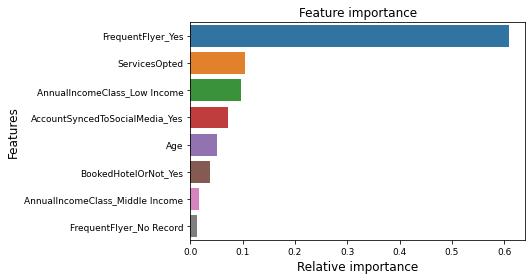

In [25]:
indices = np.argsort(GBC.feature_importances_)[::-1][:40]
g = sns.barplot(y=X.columns[indices][:40],x = GBC.feature_importances_[indices][:40] , orient='h')
g.set_xlabel("Relative importance",fontsize=12)
g.set_ylabel("Features",fontsize=12)

g.tick_params(labelsize=9)
g.set_title("Feature importance")

In [16]:
from sklearn.pipeline import make_pipeline

pipe2 = make_pipeline(StandardScaler(), xgb.XGBClassifier())
pipe2.fit(X_train, y_train)
print(pipe2.score(X_test, y_test))

/home/fabiola/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:33:45] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8848167539267016
